# Chicago Crime Theft Data Analysis

> This is by us. Handling crime data of Chicago from 2001 to 2017

> Thanks to These projects:
> - https://www.kaggle.com/fahd09/eda-of-crime-in-chicago-2005-2016
> - 朱小波, 李昕, 叶信岳. 数据关联背景下芝加哥市一般盗窃案件的多维度分析[J]. 犯罪研究, 2018(4):10.

## Importing Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc

In [2]:
Crime_2001_to_2004 = pd.read_csv("../Data/Crimes in Chicago_An extensive dataset of crimes in Chicago (2001-2017), by City of Chicago/Chicago_Crimes_2001_to_2004.csv", error_bad_lines=False)
Crime_2005_to_2007 = pd.read_csv("../Data/Crimes in Chicago_An extensive dataset of crimes in Chicago (2001-2017), by City of Chicago/Chicago_Crimes_2005_to_2007.csv", error_bad_lines=False)
Crime_2008_to_2011 = pd.read_csv("../Data/Crimes in Chicago_An extensive dataset of crimes in Chicago (2001-2017), by City of Chicago/Chicago_Crimes_2008_to_2011.csv", error_bad_lines=False)
Crime_2012_to_2017 = pd.read_csv("../Data/Crimes in Chicago_An extensive dataset of crimes in Chicago (2001-2017), by City of Chicago/Chicago_Crimes_2012_to_2017.csv", error_bad_lines=False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
/home/hanpeng/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
print(Crime_2001_to_2004.columns)
Crime_2001_to_2004.head()

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


### ERROR

When trying to read data with

`Crime_2001_to_2004 = pd.read_csv("../Data/Crimes in Chicago_An extensive dataset of crimes in Chicago (2001-2017), by City of Chicago/Chicago_Crimes_2001_to_2004.csv")`

Got an Error that goes like:

> ParserError: Error tokenizing data. C error: Expected 23 fields in line 1513591, saw 24

The solution is:

`Crime_2001_to_2004 = pd.read_csv("../Data/Crimes in Chicago_An extensive dataset of crimes in Chicago (2001-2017), by City of Chicago/Chicago_Crimes_2001_to_2004.csv", error_bad_lines=False)`

So now it works:

> b'Skipping line 1513591: expected 23 fields, saw 24\n'
/home/hanpeng/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,

The reason being:

> 读取文件时遇到和列数不对应的行，此时会报错。若报错行可以忽略，则添加该参数
> When the column number of one line doesn't met the header row's

### Data Combination

> To Combine the four files' data into one
> 
> gc.collect() to guarentee to save RAM

In [4]:
Crime_2001_to_2017 = pd.concat([Crime_2001_to_2004, Crime_2005_to_2007, Crime_2008_to_2011, Crime_2012_to_2017])
del Crime_2001_to_2004
del Crime_2005_to_2007
del Crime_2008_to_2011
del Crime_2012_to_2017
gc.collect()

15

Copy the data so you can do whatever you want to Crime_data without messing with Crime_2001_to_2017. If something came up, you can easily restore it.

In [5]:
Crime_data = Crime_2001_to_2017.copy()

In [6]:
print('Crime_data loaded!')

Crime_data loaded!


### Dropping Duplicated ones

What makes two cases duplicated?

- Could it be case number?

In [7]:
pd.DataFrame(Crime_data).groupby(['Case Number']).count()

,Unnamed: 0,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Case Number,,,,,,,,,,,,,,,,,,,,,
01G050460,2,2,2,2,2,2,2,2,2,2,...,0,0,2,2,2,2,2,2,2,2
03J493690,2,2,2,2,2,2,2,2,2,2,...,2,2,2,0,0,2,2,0,0,0
04X245238,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
07C115980,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
07HN36467,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZ572583,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ZZ591134,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ZZ696090,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


It looks convincing, so be it! Let's drop duplicated ones by that:

In [8]:
print("Before drop_duplicates: ", Crime_data.shape)
Crime_data.drop_duplicates(subset=['Case Number'], inplace=True)
print("After drop_duplicates: ", Crime_data.shape)

Before drop_duplicates:  (7941282, 23)
After drop_duplicates:  (6170473, 23)


## Basic Info

> In short!

In [9]:
Crime_data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [10]:
print("Types of crime: \n", np.array(Crime_data['Primary Type'].drop_duplicates()))

Types of crime: 
 ['THEFT' 'OTHER OFFENSE' 'OFFENSE INVOLVING CHILDREN'
 'CRIM SEXUAL ASSAULT' 'MOTOR VEHICLE THEFT' 'SEX OFFENSE'
 'DECEPTIVE PRACTICE' 'BATTERY' 'BURGLARY' 'WEAPONS VIOLATION'
 'PUBLIC PEACE VIOLATION' 'NARCOTICS' 'GAMBLING' 'PROSTITUTION'
 'LIQUOR LAW VIOLATION' 'INTERFERENCE WITH PUBLIC OFFICER'
 'CRIMINAL DAMAGE' 'ASSAULT' 'STALKING' 'ARSON' 'CRIMINAL TRESPASS'
 'HOMICIDE' 'ROBBERY' 'OBSCENITY' 'KIDNAPPING' 'INTIMIDATION' 'RITUALISM'
 'DOMESTIC VIOLENCE' 'OTHER NARCOTIC VIOLATION' 'PUBLIC INDECENCY'
 'NON-CRIMINAL' 'HUMAN TRAFFICKING' 'CONCEALED CARRY LICENSE VIOLATION'
 'NON - CRIMINAL' 'NON-CRIMINAL (SUBJECT SPECIFIED)']


In [11]:
print("Location Type: \n", np.array(Crime_data['Location Description'].drop_duplicates().head()))

Location Type: 
 ['RESIDENCE' 'OTHER' 'APARTMENT' 'RESIDENCE PORCH/HALLWAY' 'GAS STATION']


## Data Selection

There are three types of crime that fits the defination of stealing: THEFT, MOTOR VEHICLE THEFT, BURGLARY.

So we should only keep data of them and forget about others.

In [12]:
Crime_data.index = Crime_data['Case Number']

In [13]:
print("Before the drop, it's ", Crime_data.shape)
Crime_data.drop(Crime_data[ 
                    (Crime_data['Primary Type'] != "THEFT") &
                    (Crime_data['Primary Type'] != "MOTOR VEHICLE THEFT") &
                    (Crime_data['Primary Type'] != 'BURGLARY')
                ].index, inplace=True, axis=0)
print("After the drop, it's ", Crime_data.shape)

Before the drop, it's  (6170473, 23)
After the drop, it's  (1937260, 23)


There's nothing wrong with the process above, so we can del Crime_2001_to_2017 to save RAM, and give it a new value for backup purposes. gc.collect() to make sure RAM stay low

In [15]:
del Crime_2001_to_2017
Crime_2001_to_2017 = Crime_data.copy()
gc.collect()

15

## Data Analysis and Visualization

Turning it into df

In [ ]:
df = pd.DataFrame(Crime_data)

### Percentages

- Percenrages of three in all

<AxesSubplot:ylabel='Case Number'>

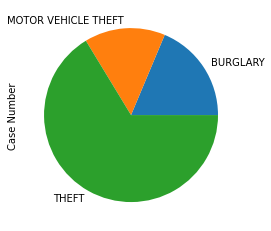

In [64]:
countTotal = df.groupby(['Primary Type']).count()['Case Number']
countSum = countTotal.sum()
percentageTotal = countTotal.div(countSum, axis=0)
percentageTotal.plot(kind='pie')

- Percentages of three types of crimes each year

<AxesSubplot:xlabel='Year'>

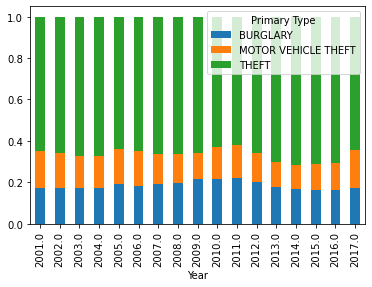

In [50]:
EachCountByYear = pd.crosstab(Crime_data['Year'], Crime_data['Primary Type'])
sumOfEachYear = EachCountByYear.sum(axis=1)
percentagePerYear = EachCountByYear.div(sumOfEachYear, axis=0)
percentagePerYear.plot(kind='bar', stacked=True)